# Experimento 2: classificação com SVM

- Classificador SVM usando atributos FS20, 30 realizações.

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

In [2]:
def acuracia_por_frequencia(
        frequence:np.ndarray,
        y_true:np.ndarray,
        y_pred:np.ndarray,
        rodada : int = 0
    )->pd.DataFrame:
    
    df = pd.DataFrame(
        data=[frequence, y_true, y_pred],
        index=['freq', 'true', 'pred']
        ).transpose()

    score_dict = {}

    for freq, sub_df in df.groupby('freq'):
        score_dict[f'freq_{freq}_support'] = len(sub_df)
        score_dict[f'freq_{freq}_acc'] = accuracy_score(y_true=sub_df['true'].values,
                                                        y_pred=sub_df['pred'].values)
    return pd.DataFrame(score_dict, index=[rodada])


## Carregando dados e classificação

seeds: [4803 6011 2946 2525  238 1970 3551 5672 3555 6121 3142 3389 5773 4545
  881 5859 6265 4917 1077 4869 7435 6653 3002 7682 5814 7325 2832 6700
 6908 3281]
Rodada: 0 - seed: 4803

              precision    recall  f1-score   support

      Normal       0.93      0.97      0.95        76
        HI-1       0.79      0.86      0.82        84
        HI-2       0.96      0.68      0.80        73
        HI-3       0.84      0.93      0.89        75
        LI-1       0.81      0.72      0.76        67
        LI-2       0.89      1.00      0.94        79
        LI-3       1.00      1.00      1.00        65

    accuracy                           0.88       519
   macro avg       0.89      0.88      0.88       519
weighted avg       0.89      0.88      0.88       519



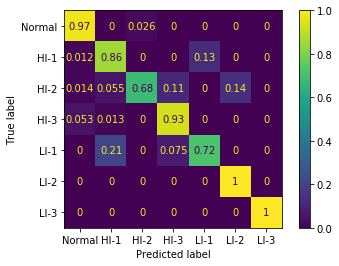

Rodada: 1 - seed: 6011

              precision    recall  f1-score   support

      Normal       0.96      0.87      0.91        79
        HI-1       0.82      0.74      0.78        80
        HI-2       0.95      0.82      0.88        72
        HI-3       0.83      0.97      0.90        77
        LI-1       0.71      0.76      0.74        68
        LI-2       0.90      1.00      0.95        66
        LI-3       1.00      1.00      1.00        77

    accuracy                           0.88       519
   macro avg       0.88      0.88      0.88       519
weighted avg       0.88      0.88      0.88       519



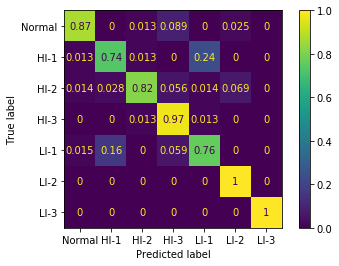

Rodada: 2 - seed: 2946

              precision    recall  f1-score   support

      Normal       0.93      0.98      0.95        81
        HI-1       0.70      0.76      0.73        66
        HI-2       0.94      0.77      0.84        77
        HI-3       0.87      0.90      0.89        82
        LI-1       0.72      0.70      0.71        63
        LI-2       0.94      0.99      0.96        78
        LI-3       1.00      1.00      1.00        72

    accuracy                           0.88       519
   macro avg       0.87      0.87      0.87       519
weighted avg       0.88      0.88      0.88       519



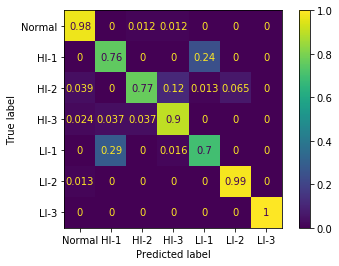

Rodada: 3 - seed: 2525

              precision    recall  f1-score   support

      Normal       0.87      0.96      0.91        69
        HI-1       0.68      0.84      0.75        81
        HI-2       0.98      0.73      0.84        83
        HI-3       0.90      0.91      0.90        77
        LI-1       0.78      0.61      0.69        77
        LI-2       0.85      1.00      0.92        64
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.86       519
   macro avg       0.87      0.86      0.86       519
weighted avg       0.86      0.86      0.85       519



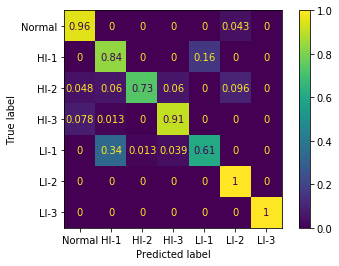

Rodada: 4 - seed: 238

              precision    recall  f1-score   support

      Normal       0.94      0.94      0.94        90
        HI-1       0.66      0.89      0.75        71
        HI-2       0.94      0.72      0.82        68
        HI-3       0.88      0.96      0.92        68
        LI-1       0.86      0.58      0.69        76
        LI-2       0.88      1.00      0.93        71
        LI-3       1.00      1.00      1.00        75

    accuracy                           0.87       519
   macro avg       0.88      0.87      0.87       519
weighted avg       0.88      0.87      0.87       519



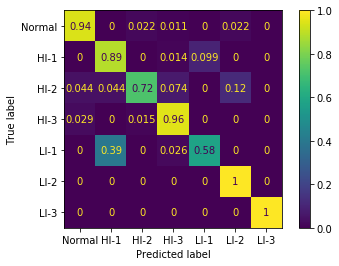

Rodada: 5 - seed: 1970

              precision    recall  f1-score   support

      Normal       0.89      0.98      0.93        63
        HI-1       0.64      0.81      0.72        69
        HI-2       0.98      0.70      0.82        81
        HI-3       0.82      0.94      0.88        70
        LI-1       0.82      0.63      0.71        86
        LI-2       0.91      1.00      0.95        77
        LI-3       1.00      1.00      1.00        73

    accuracy                           0.86       519
   macro avg       0.87      0.87      0.86       519
weighted avg       0.87      0.86      0.85       519



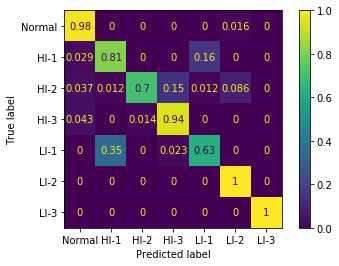

Rodada: 6 - seed: 3551

              precision    recall  f1-score   support

      Normal       0.95      0.96      0.96        78
        HI-1       0.70      0.91      0.79        69
        HI-2       1.00      0.78      0.88        78
        HI-3       0.86      0.92      0.89        78
        LI-1       0.87      0.67      0.75        78
        LI-2       0.91      1.00      0.95        69
        LI-3       1.00      1.00      1.00        69

    accuracy                           0.89       519
   macro avg       0.90      0.89      0.89       519
weighted avg       0.90      0.89      0.89       519



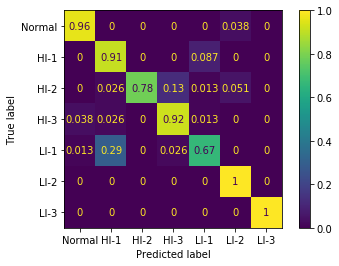

Rodada: 7 - seed: 5672

              precision    recall  f1-score   support

      Normal       0.94      0.96      0.95        79
        HI-1       0.58      0.91      0.71        66
        HI-2       0.95      0.79      0.87        73
        HI-3       0.86      0.90      0.88        70
        LI-1       0.88      0.52      0.65        83
        LI-2       0.93      0.97      0.95        76
        LI-3       1.00      1.00      1.00        72

    accuracy                           0.86       519
   macro avg       0.88      0.87      0.86       519
weighted avg       0.88      0.86      0.86       519



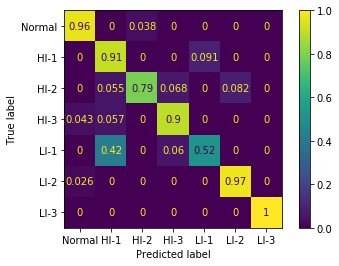

Rodada: 8 - seed: 3555

              precision    recall  f1-score   support

      Normal       0.88      0.93      0.91        72
        HI-1       0.70      0.85      0.77        79
        HI-2       0.95      0.75      0.84        72
        HI-3       0.93      0.80      0.86        71
        LI-1       0.79      0.71      0.74        68
        LI-2       0.87      1.00      0.93        76
        LI-3       1.00      1.00      1.00        81

    accuracy                           0.87       519
   macro avg       0.87      0.86      0.86       519
weighted avg       0.87      0.87      0.87       519



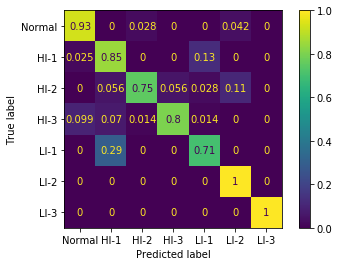

Rodada: 9 - seed: 6121

              precision    recall  f1-score   support

      Normal       0.88      0.95      0.92        64
        HI-1       0.72      0.81      0.77        70
        HI-2       0.94      0.84      0.89        75
        HI-3       0.93      0.93      0.93        74
        LI-1       0.78      0.69      0.74        72
        LI-2       0.94      0.96      0.95        76
        LI-3       1.00      1.00      1.00        88

    accuracy                           0.89       519
   macro avg       0.89      0.88      0.88       519
weighted avg       0.89      0.89      0.89       519



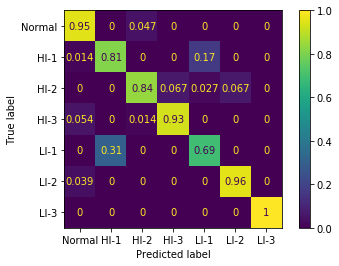

Rodada: 10 - seed: 3142

              precision    recall  f1-score   support

      Normal       0.97      0.91      0.94        81
        HI-1       0.73      0.83      0.78        84
        HI-2       0.87      0.75      0.81        80
        HI-3       0.85      0.88      0.86        76
        LI-1       0.71      0.67      0.69        63
        LI-2       0.92      0.99      0.95        72
        LI-3       1.00      1.00      1.00        63

    accuracy                           0.86       519
   macro avg       0.86      0.86      0.86       519
weighted avg       0.86      0.86      0.86       519



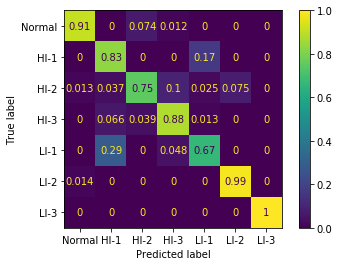

Rodada: 11 - seed: 3389

              precision    recall  f1-score   support

      Normal       0.93      0.95      0.94        74
        HI-1       0.77      0.77      0.77        73
        HI-2       0.93      0.76      0.84        74
        HI-3       0.92      0.90      0.91        84
        LI-1       0.72      0.80      0.76        69
        LI-2       0.90      1.00      0.95        72
        LI-3       1.00      0.99      0.99        73

    accuracy                           0.88       519
   macro avg       0.88      0.88      0.88       519
weighted avg       0.88      0.88      0.88       519



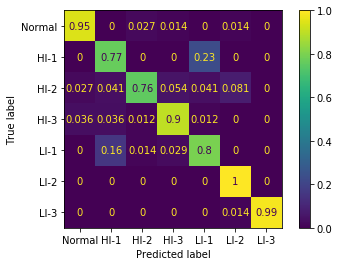

Rodada: 12 - seed: 5773

              precision    recall  f1-score   support

      Normal       0.94      0.99      0.96        69
        HI-1       0.67      0.72      0.69        64
        HI-2       0.98      0.74      0.84        69
        HI-3       0.88      0.95      0.91        82
        LI-1       0.75      0.65      0.70        81
        LI-2       0.87      1.00      0.93        78
        LI-3       1.00      1.00      1.00        76

    accuracy                           0.87       519
   macro avg       0.87      0.86      0.86       519
weighted avg       0.87      0.87      0.86       519



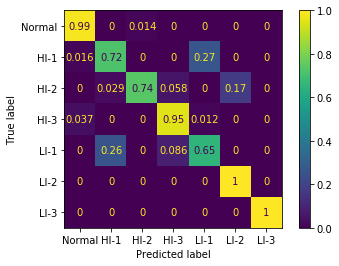

Rodada: 13 - seed: 4545

              precision    recall  f1-score   support

      Normal       0.92      0.98      0.95        60
        HI-1       0.75      0.83      0.79        83
        HI-2       0.98      0.87      0.92        75
        HI-3       0.88      0.96      0.92        71
        LI-1       0.80      0.70      0.74        79
        LI-2       0.98      0.98      0.98        81
        LI-3       1.00      1.00      1.00        70

    accuracy                           0.90       519
   macro avg       0.90      0.90      0.90       519
weighted avg       0.90      0.90      0.90       519



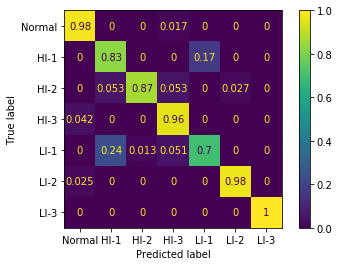

Rodada: 14 - seed: 881

              precision    recall  f1-score   support

      Normal       0.94      0.94      0.94        78
        HI-1       0.76      0.43      0.55        74
        HI-2       0.92      0.74      0.82        81
        HI-3       0.86      0.89      0.88        75
        LI-1       0.58      0.90      0.70        63
        LI-2       0.87      0.99      0.92        68
        LI-3       1.00      1.00      1.00        80

    accuracy                           0.84       519
   macro avg       0.85      0.84      0.83       519
weighted avg       0.86      0.84      0.83       519



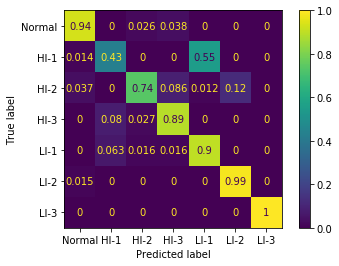

Rodada: 15 - seed: 5859

              precision    recall  f1-score   support

      Normal       0.93      0.95      0.94        66
        HI-1       0.70      0.86      0.78        74
        HI-2       0.95      0.77      0.85        79
        HI-3       0.89      0.90      0.89        79
        LI-1       0.79      0.62      0.69        71
        LI-2       0.89      1.00      0.94        79
        LI-3       1.00      1.00      1.00        71

    accuracy                           0.87       519
   macro avg       0.88      0.87      0.87       519
weighted avg       0.88      0.87      0.87       519



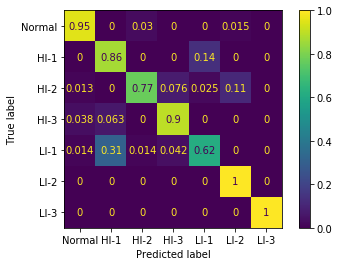

Rodada: 16 - seed: 6265

              precision    recall  f1-score   support

      Normal       0.86      0.85      0.85        72
        HI-1       0.74      0.88      0.80        92
        HI-2       0.89      0.74      0.81        86
        HI-3       0.84      0.92      0.88        71
        LI-1       0.81      0.63      0.71        76
        LI-2       0.89      1.00      0.94        63
        LI-3       1.00      1.00      1.00        59

    accuracy                           0.85       519
   macro avg       0.86      0.86      0.86       519
weighted avg       0.85      0.85      0.85       519



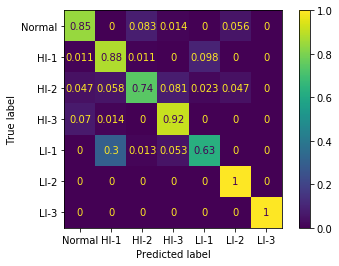

Rodada: 17 - seed: 4917

              precision    recall  f1-score   support

      Normal       0.94      0.99      0.96        68
        HI-1       0.74      0.85      0.79        92
        HI-2       0.95      0.76      0.84        70
        HI-3       0.81      0.91      0.86        69
        LI-1       0.76      0.61      0.68        74
        LI-2       0.94      0.97      0.96        78
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.87       519
   macro avg       0.88      0.87      0.87       519
weighted avg       0.87      0.87      0.86       519



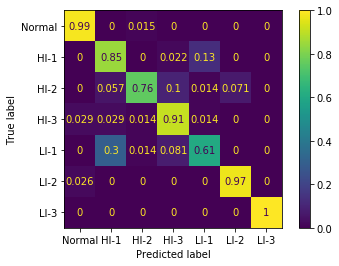

Rodada: 18 - seed: 1077

              precision    recall  f1-score   support

      Normal       0.89      0.99      0.94        74
        HI-1       0.69      0.84      0.76        80
        HI-2       0.98      0.76      0.86        63
        HI-3       0.88      0.87      0.88        77
        LI-1       0.79      0.65      0.71        74
        LI-2       0.96      1.00      0.98        68
        LI-3       1.00      1.00      1.00        83

    accuracy                           0.87       519
   macro avg       0.88      0.87      0.87       519
weighted avg       0.88      0.87      0.87       519



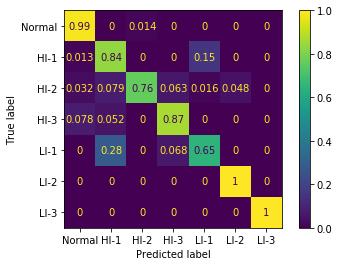

Rodada: 19 - seed: 4869

              precision    recall  f1-score   support

      Normal       0.97      0.94      0.96        68
        HI-1       0.73      0.86      0.79        83
        HI-2       0.95      0.72      0.82        72
        HI-3       0.88      0.95      0.91        79
        LI-1       0.82      0.72      0.77        75
        LI-2       0.90      1.00      0.95        70
        LI-3       1.00      1.00      1.00        72

    accuracy                           0.88       519
   macro avg       0.89      0.88      0.88       519
weighted avg       0.89      0.88      0.88       519



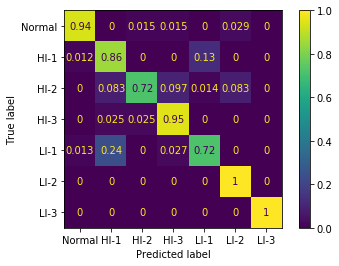

Rodada: 20 - seed: 7435

              precision    recall  f1-score   support

      Normal       0.87      0.96      0.91        68
        HI-1       0.69      0.82      0.75        83
        HI-2       0.95      0.75      0.84        83
        HI-3       0.91      0.87      0.89        70
        LI-1       0.75      0.67      0.70        66
        LI-2       0.93      1.00      0.96        75
        LI-3       1.00      1.00      1.00        74

    accuracy                           0.87       519
   macro avg       0.87      0.87      0.86       519
weighted avg       0.87      0.87      0.86       519



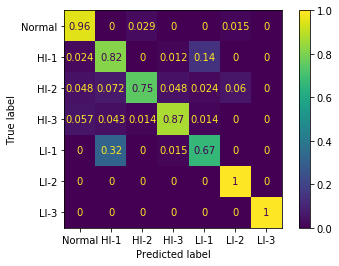

Rodada: 21 - seed: 6653

              precision    recall  f1-score   support

      Normal       0.92      0.81      0.86        69
        HI-1       0.75      0.77      0.76        81
        HI-2       0.89      0.72      0.80        69
        HI-3       0.81      0.97      0.89        72
        LI-1       0.74      0.74      0.74        68
        LI-2       0.92      0.98      0.95        84
        LI-3       1.00      1.00      1.00        76

    accuracy                           0.86       519
   macro avg       0.86      0.86      0.86       519
weighted avg       0.86      0.86      0.86       519



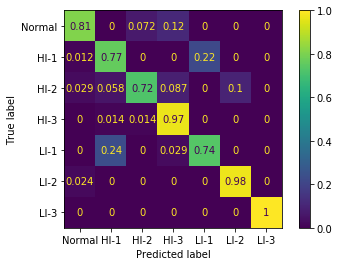

Rodada: 22 - seed: 3002

              precision    recall  f1-score   support

      Normal       0.87      0.99      0.93        69
        HI-1       0.74      0.86      0.79        72
        HI-2       0.94      0.74      0.83        82
        HI-3       0.88      0.86      0.87        79
        LI-1       0.81      0.69      0.74        67
        LI-2       0.89      1.00      0.94        67
        LI-3       1.00      1.00      1.00        83

    accuracy                           0.88       519
   macro avg       0.88      0.88      0.87       519
weighted avg       0.88      0.88      0.87       519



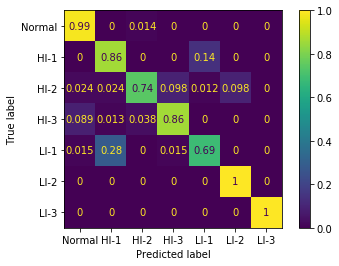

Rodada: 23 - seed: 7682

              precision    recall  f1-score   support

      Normal       0.94      0.99      0.96        74
        HI-1       0.79      0.89      0.84        82
        HI-2       0.92      0.77      0.84        74
        HI-3       0.85      0.90      0.87        79
        LI-1       0.82      0.67      0.74        63
        LI-2       0.93      1.00      0.97        71
        LI-3       1.00      1.00      1.00        76

    accuracy                           0.89       519
   macro avg       0.89      0.89      0.89       519
weighted avg       0.89      0.89      0.89       519



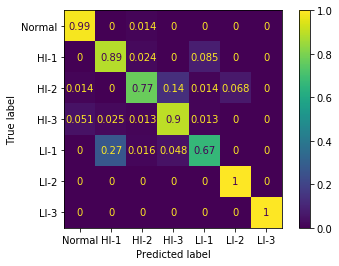

Rodada: 24 - seed: 5814

              precision    recall  f1-score   support

      Normal       0.91      0.96      0.93        70
        HI-1       0.71      0.85      0.77        82
        HI-2       0.98      0.68      0.81        76
        HI-3       0.82      0.94      0.88        68
        LI-1       0.83      0.64      0.72        77
        LI-2       0.88      1.00      0.94        74
        LI-3       1.00      1.00      1.00        72

    accuracy                           0.86       519
   macro avg       0.88      0.87      0.86       519
weighted avg       0.87      0.86      0.86       519



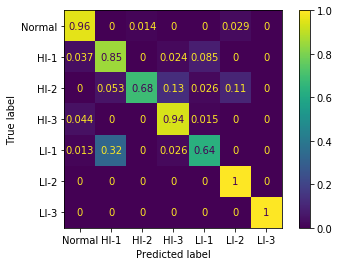

Rodada: 25 - seed: 7325

              precision    recall  f1-score   support

      Normal       0.86      0.98      0.92        56
        HI-1       0.74      0.83      0.78        82
        HI-2       0.94      0.78      0.85        77
        HI-3       0.84      0.88      0.86        80
        LI-1       0.77      0.64      0.70        73
        LI-2       0.94      1.00      0.97        80
        LI-3       1.00      0.99      0.99        71

    accuracy                           0.87       519
   macro avg       0.87      0.87      0.87       519
weighted avg       0.87      0.87      0.87       519



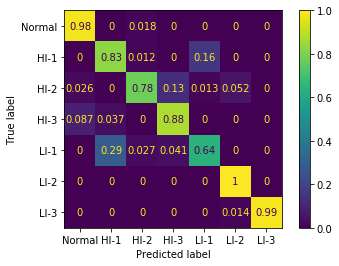

Rodada: 26 - seed: 2832

              precision    recall  f1-score   support

      Normal       0.96      0.96      0.96        68
        HI-1       0.69      0.85      0.76        81
        HI-2       0.95      0.71      0.82        84
        HI-3       0.89      0.90      0.89        87
        LI-1       0.74      0.63      0.68        62
        LI-2       0.87      1.00      0.93        69
        LI-3       1.00      1.00      1.00        68

    accuracy                           0.86       519
   macro avg       0.87      0.86      0.86       519
weighted avg       0.87      0.86      0.86       519



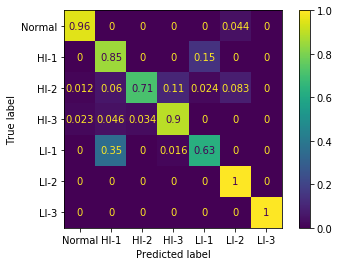

Rodada: 27 - seed: 6700

              precision    recall  f1-score   support

      Normal       0.88      1.00      0.94        58
        HI-1       0.70      0.80      0.75        74
        HI-2       0.96      0.74      0.84        73
        HI-3       0.85      0.92      0.88        77
        LI-1       0.84      0.72      0.77        85
        LI-2       0.94      0.99      0.96        77
        LI-3       1.00      1.00      1.00        75

    accuracy                           0.87       519
   macro avg       0.88      0.88      0.88       519
weighted avg       0.88      0.87      0.87       519



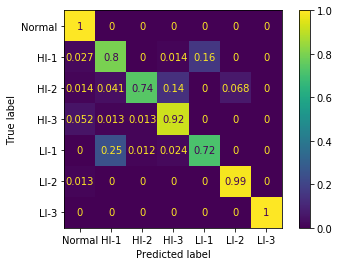

Rodada: 28 - seed: 6908

              precision    recall  f1-score   support

      Normal       0.84      0.97      0.90        66
        HI-1       0.70      0.86      0.78        74
        HI-2       0.95      0.83      0.89        76
        HI-3       0.93      0.86      0.90        80
        LI-1       0.86      0.70      0.78        71
        LI-2       0.96      0.99      0.97        77
        LI-3       1.00      1.00      1.00        75

    accuracy                           0.89       519
   macro avg       0.89      0.89      0.89       519
weighted avg       0.90      0.89      0.89       519



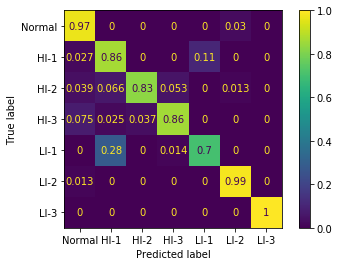

Rodada: 29 - seed: 3281

              precision    recall  f1-score   support

      Normal       0.85      1.00      0.92        64
        HI-1       0.68      0.74      0.71        65
        HI-2       0.84      0.69      0.76        75
        HI-3       0.88      0.75      0.81        84
        LI-1       0.73      0.74      0.74        70
        LI-2       0.92      1.00      0.96        86
        LI-3       1.00      1.00      1.00        75

    accuracy                           0.85       519
   macro avg       0.84      0.85      0.84       519
weighted avg       0.85      0.85      0.85       519



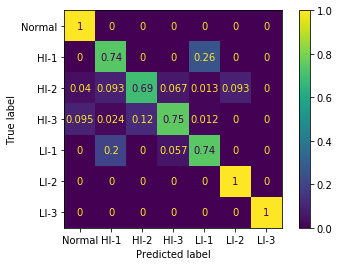

In [3]:
TARGET_LABELS = ['Normal', 'HI-1', 'HI-2', 'HI-3', 'LI-1', 'LI-2', 'LI-3']

fs20_df = pd.read_csv('./csvs/fs20.csv')

y = fs20_df.pop('target').values
X = fs20_df.values

random_seeds = np.random.randint(0, 8000, 30)
print(f'seeds: {random_seeds}')

acc_por_rodada = []
freq_scores_df = []

for rodada, seed in enumerate(random_seeds):
    # Distribuindo os dados
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

    # Instanciando e treinando classificador
    classifier = make_pipeline(
        StandardScaler(),
        SVC(cache_size=500)
        ).fit(
            X_train,
            y_train)

    # Realizando predição
    y_pred = classifier.predict(X_test)

    # Retorna a ultima coluna da matriz, que contém as frequências
    freq_test = X_test[:,-1]
    
    # Adicionando resultados à respectiva lista
    acc_por_rodada.append(
        accuracy_score(
            y_true=y_test,
            y_pred=y_pred))

    freq_scores_df.append(
        acuracia_por_frequencia(
            frequence=freq_test,
            y_true=y_test,
            y_pred=y_pred,
            rodada=rodada))

    # Exibindo resultados
    print(f'Rodada: {rodada} - seed: {seed}\n')

    print(classification_report(y_test, y_pred, target_names=TARGET_LABELS))
    
    plot_confusion_matrix(
        estimator=classifier,
        X=X_test,
        y_true=y_test,
        normalize='true',
        display_labels=TARGET_LABELS)
    
    plt.show()

## Resultados gerais

count    30.000000
mean      0.870520
std       0.013712
min       0.840077
25%       0.861753
50%       0.868979
75%       0.880539
max       0.895954
Name: Acurácia, dtype: float64


Acurácia
0.882466
0.880539
0.876686
0.855491
0.870906
0.857418
0.888247
0.859345
0.867052
0.888247


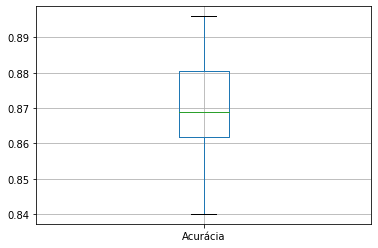

In [4]:
acc_s = pd.Series(data=acc_por_rodada, name='Acurácia')

print(acc_s.describe())

acc_s.to_frame().boxplot()

acc_s.to_frame().style.hide_index().background_gradient(cmap='Blues')

## Resultados por frequência

In [5]:
freq_df = pd.concat(freq_scores_df, ignore_index=True)

acc_columns = [col for col in freq_df.columns if 'acc' in col]
sup_columns = [col for col in freq_df.columns if 'support' in col]

freq_accs = freq_df[acc_columns]
freq_sups = freq_df[sup_columns]

### Acurácias por frequências

In [6]:
freq_accs.style.hide_index()

freq_30.0_acc,freq_35.0_acc,freq_40.0_acc,freq_45.0_acc,freq_50.0_acc,freq_55.0_acc,freq_60.0_acc
0.830986,0.723684,0.902439,0.976744,0.955224,0.955224,0.828571
0.763889,0.827160,0.912500,0.960000,0.940299,0.926471,0.842105
0.833333,0.746479,0.830986,1.000000,0.928571,0.904762,0.888889
0.808824,0.757143,0.741176,0.988372,0.936508,0.960000,0.791667
0.884615,0.750000,0.831325,0.974026,0.934426,0.911392,0.811594
0.726027,0.768116,0.890244,0.986842,0.916667,0.936709,0.750000
0.814815,0.758065,0.911765,0.988235,0.916667,0.939759,0.852941
0.819444,0.775862,0.835821,0.950000,0.923077,0.955056,0.738636
0.808219,0.800000,0.898734,0.945946,0.900000,0.891892,0.824324
0.848485,0.805195,0.896104,0.962963,0.944444,0.933333,0.816901


,freq_30.0_acc,freq_35.0_acc,freq_40.0_acc,freq_45.0_acc,freq_50.0_acc,freq_55.0_acc,freq_60.0_acc
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.814789,0.781026,0.869824,0.963285,0.923507,0.931799,0.808954
std,0.037032,0.043009,0.044418,0.025377,0.024989,0.026774,0.037107
min,0.726027,0.723684,0.741176,0.888889,0.873239,0.829787,0.738636
25%,0.803765,0.747845,0.835426,0.947868,0.905005,0.921959,0.786875
50%,0.820170,0.771989,0.877249,0.969114,0.923660,0.935481,0.814248
75%,0.837963,0.805465,0.898410,0.984900,0.939839,0.949449,0.835615
max,0.884615,0.916667,0.953846,1.000000,0.972222,0.970588,0.888889


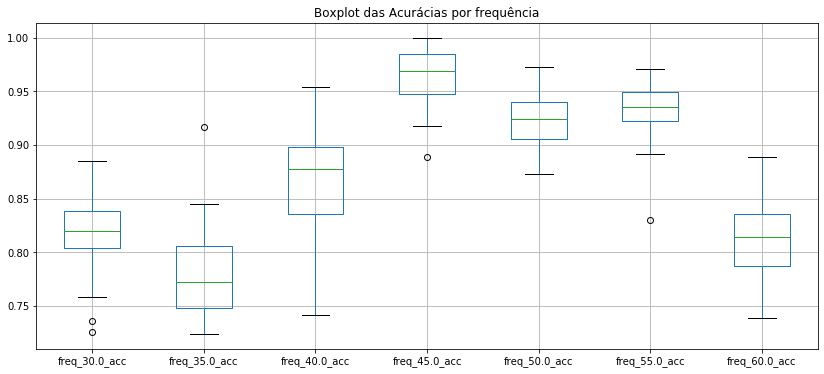

In [7]:
freq_accs.boxplot(figsize=(14, 6)).set(title='Boxplot das Acurácias por frequência')
freq_accs.describe()

### Distribuições de frequências por amostra

In [8]:
freq_sups.style.hide_index()

freq_30.0_support,freq_35.0_support,freq_40.0_support,freq_45.0_support,freq_50.0_support,freq_55.0_support,freq_60.0_support
71,76,82,86,67,67,70
72,81,80,75,67,68,76
78,71,71,73,70,84,72
68,70,85,86,63,75,72
78,72,83,77,61,79,69
73,69,82,76,72,79,68
81,62,68,85,72,83,68
72,58,67,80,65,89,88
73,75,79,74,70,74,74
66,77,77,81,72,75,71


,freq_30.0_support,freq_35.0_support,freq_40.0_support,freq_45.0_support,freq_50.0_support,freq_55.0_support,freq_60.0_support
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,70.800000,73.500000,77.466667,74.533333,69.866667,78.266667,74.566667
std,7.475938,7.998922,6.647444,7.010993,5.661323,7.741217,4.973609
min,53.000000,58.000000,62.000000,59.000000,58.000000,64.000000,68.000000
25%,66.250000,70.250000,73.750000,72.000000,66.000000,74.000000,71.000000
50%,72.000000,73.500000,79.000000,74.500000,70.500000,78.500000,74.000000
75%,74.750000,77.000000,82.000000,79.750000,72.000000,84.750000,76.000000
max,87.000000,90.000000,89.000000,86.000000,84.000000,94.000000,88.000000


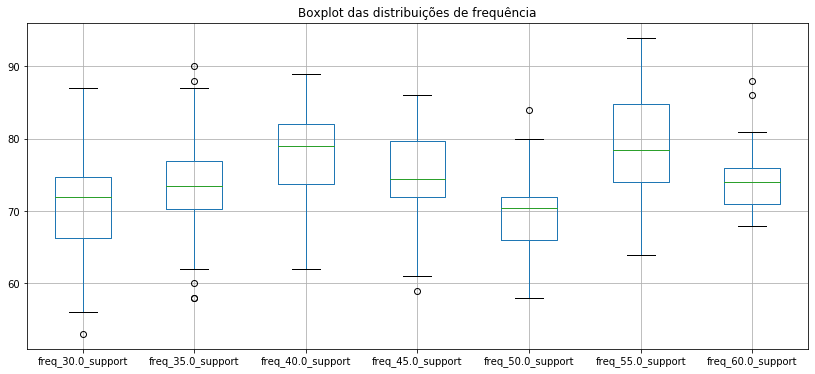

In [9]:
freq_sups.boxplot(figsize=(14, 6)).set(title='Boxplot das distribuições de frequência')
freq_sups.describe()